In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.odr as odr
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats

# Energy vs channel number (Calibration with Eu-152 source)

In [75]:
Channel = np.array([571.127,1113.463,1552.375,1846.013,1990.965,3463.957,3852.955,4276.057,4923.908,6216.950])
ChannelErr = np.array([0.084,0.236,0.120,0.583,0.344,0.212,0.468,0.242,0.246,0.137])
Energy = np.array([121.6,244.5,344.1,410.9,443.7,778.6,867.0,963.7,1111.7,1407.6])
EnergyErr = np.zeros(len(Energy))

In [76]:
# Define your function
def EnergyFunc(x,a,b,c):
    return a + b*x + c**2

#Pass function, x-values, y-values, y-error, bounds
popt, pcov = curve_fit(EnergyFunc, Channel, Energy, bounds=((0,0,0), (2,500,10)))

#print out fitted parameters
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)
print("c =", popt[2], "+/-", pcov[2,2]**0.5)

#Chisq definition
def ChiSq(residual, theory):
    '''
    Error function for fit
    '''
    e = (residual)/theory
    return e

#Residuals calc: y-data - y-fit
residuals = Energy - EnergyFunc(Channel, popt[0], popt[1], popt[2])
expectation = EnergyFunc(Channel, popt[0], popt[1], popt[2])
#Chisq calc 

nPoints = len(Energy)
nPars = 3

ChiSq_arr = ChiSq(residuals, expectation)**2
chisq = np.sum(ChiSq_arr)
NDF = nPoints - nPars
ChisqNDF = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}".format(chisq, ChisqNDF))

CalibrationFactor = sum(Energy/Channel)/len(Energy)
#print("Calibration factor = ", CalibrationFactor, "+/-", sum(ChannelErr)/np.sqrt(len(ChannelErr)))

a = 3.078885187697879e-11 +/- 3.57554567157874
b = 0.22535513921097844 +/- 0.0010348834001441631
c = 7.035797547686167e-08 +/- 0.0
ChiSq = 4.28e-03, ChiSq/NDF =  0.00


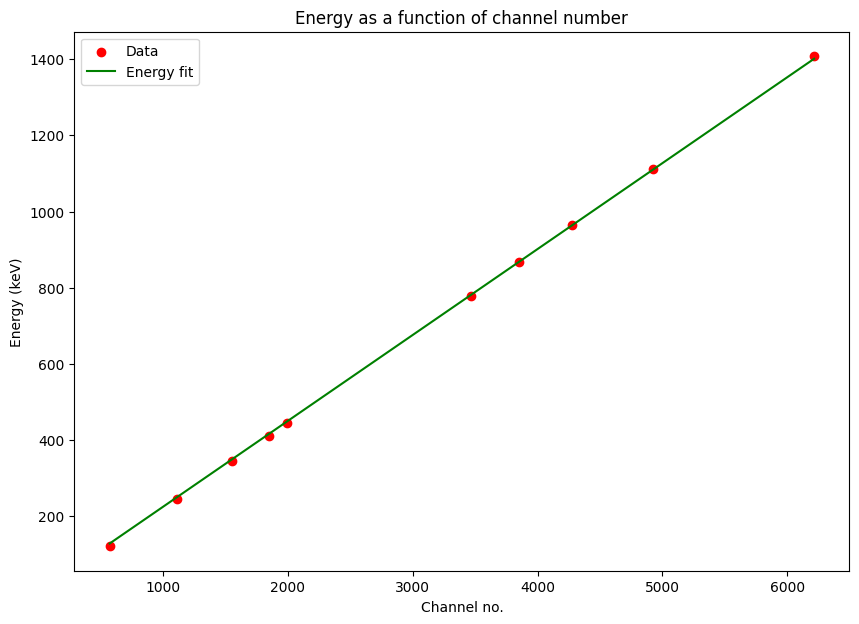

In [78]:
#Fitted line 
yfit = EnergyFunc(Channel, *popt)

plt.figure(figsize = [10,7])
plt.title("Energy as a function of channel number")
plt.xlabel("Channel no.")
plt.ylabel("Energy (keV)")
plt.scatter(Channel, Energy, color = 'r', label = 'Data')
plt.errorbar(Channel, Energy, xerr = ChannelErr, yerr = EnergyErr, color = 'k', linestyle = '')
plt.plot(Channel,yfit, color = 'g', label = 'Energy fit')
plt.legend()
plt.show()

# Energy resolution

In [88]:
Energy = np.array([121.6,244.5,344.1,410.9,443.7,778.6,867.0,963.7,1111.7,1407.6])
EnergyErr = np.zeros(len(Energy))
FWHM = np.array([3.132,3.239,3.178,3.615,3.605,3.264,3.050,3.460,3.429,3.476])
FWHMErr = np.array([0.040,0.120,0.055,0.314,0.180,0.100,0.236,0.113,0.115,0.058])
Resolution = FWHM/Energy
ResolutionErr = Resolution*np.sqrt(((FWHMErr/FWHM)**2) + ((FWHM/Energy)**2))
ResolutionErr

array([7.40478045e-04, 5.21229934e-04, 1.81173077e-04, 7.68086008e-04,
       4.11015362e-04, 1.29632418e-04, 2.72484173e-04, 1.17962829e-04,
       1.03881754e-04, 4.16536998e-05])

In [91]:
# Define your function
def ResFunc(x,a,b):
    return a + b/np.sqrt(x)

#Pass function, x-values, y-values, y-error, bounds
popt, pcov = curve_fit(ResFunc, Energy, Resolution, bounds=((-100,0), (200,1000)))

#print out fitted parameters
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

#Chisq definition
def ChiSq(residual, theory):
    '''
    Error function for fit
    '''
    e = (residual)/theory
    return e

#Residuals calc: y-data - y-fit
residuals = Resolution - ResFunc(Energy, popt[0], popt[1])
expectation = ResFunc(Energy, popt[0], popt[1])
#Chisq calc 

nPoints = len(Energy)
nPars = 2

ChiSq_arr = ChiSq(residuals, expectation)**2
chisq = np.sum(ChiSq_arr)
NDF = nPoints - nPars
ChisqNDF = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}".format(chisq, ChisqNDF))

a = -0.008398983278034336 +/- 0.0009624519336987706
b = 0.35776413508113875 +/- 0.01925187595135295
ChiSq = 1.55e+00, ChiSq/NDF =  0.19


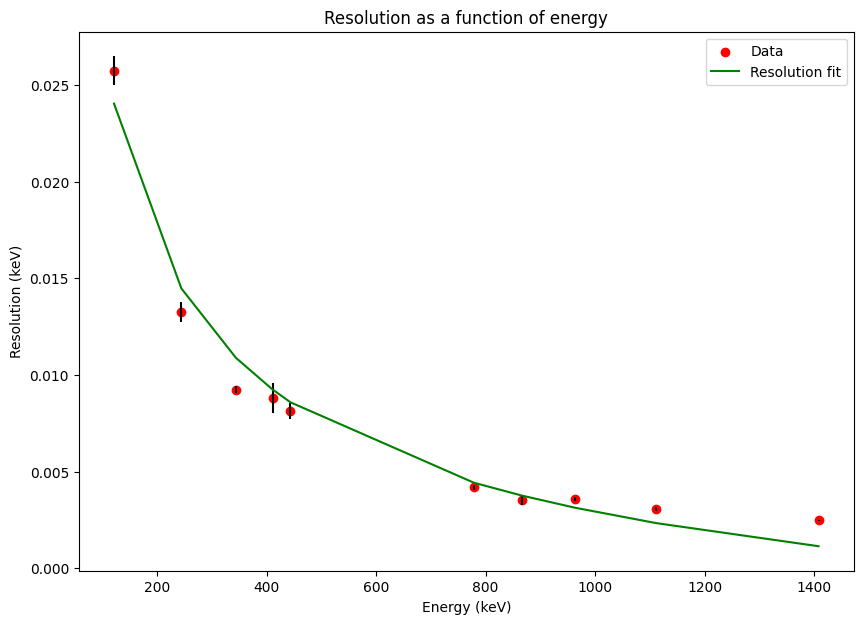

In [92]:
#Fitted line 
yfit = ResFunc(Energy, *popt)

plt.figure(figsize = [10,7])
plt.title("Resolution as a function of energy")
plt.xlabel("Energy (keV)")
plt.ylabel("Resolution (keV)")
plt.scatter(Energy, Resolution, color = 'r', label = 'Data')
plt.errorbar(Energy, Resolution, xerr = EnergyErr, yerr = ResolutionErr, color = 'k', linestyle = '')
plt.plot(Energy, yfit, color = 'g', label = 'Resolution fit')
plt.legend()
plt.show()

# Energy vs efficiency

In [83]:
Area = np.array([11435.3,1879.3,5015.7,377.9,493.4,1177.9,311.3,1076.4,905.1,1113.4])
AreaErr = np.array([236.9,105.9,149.6,47.1,35.5,58.8,35.5,58.5,50.1,33.7])
Intensity = np.array([13620,3590,12750,1070,1480,6190,1990,6920,6490,10000])
IntensityErr = np.array([160,60,90,10,20,80,40,90,90,30])
Efficiency = Area/Intensity
EfficiencyErr = Efficiency*np.sqrt(((AreaErr/Area)**2)+((IntensityErr/Intensity)**2))

In [84]:
# Define your function
def EffFunc(x,a,b,c):
    return a + b/x + c/(x*x)

#Pass function, x-values, y-values, y-error, bounds
popt, pcov = curve_fit(EffFunc, Energy, Efficiency, bounds=((-100,-100,-10000), (2,500,100)))

#print out fitted parameters
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)
print("c =", popt[2], "+/-", pcov[2,2]**0.5)

#Chisq definition
def ChiSq(residual, theory):
    '''
    Error function for fit
    '''
    e = (residual)/theory
    return e

#Residuals calc: y-data - y-fit
residuals = Efficiency - EffFunc(Energy, popt[0], popt[1], popt[2])
expectation = EffFunc(Energy, popt[0], popt[1], popt[2])
#Chisq calc 

nPoints = len(Efficiency)
nPars = 3

ChiSq_arr = ChiSq(residuals, expectation)**2
chisq = np.sum(ChiSq_arr)
NDF = nPoints - nPars
ChisqNDF = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}".format(chisq, ChisqNDF))

a = 0.0002352150985220561 +/- 0.008299394256551787
b = 157.06094761263034 +/- 5.66766149616768
c = -6701.3621796958905 +/- 628.3583194262721
ChiSq = 1.31e-02, ChiSq/NDF =  0.00


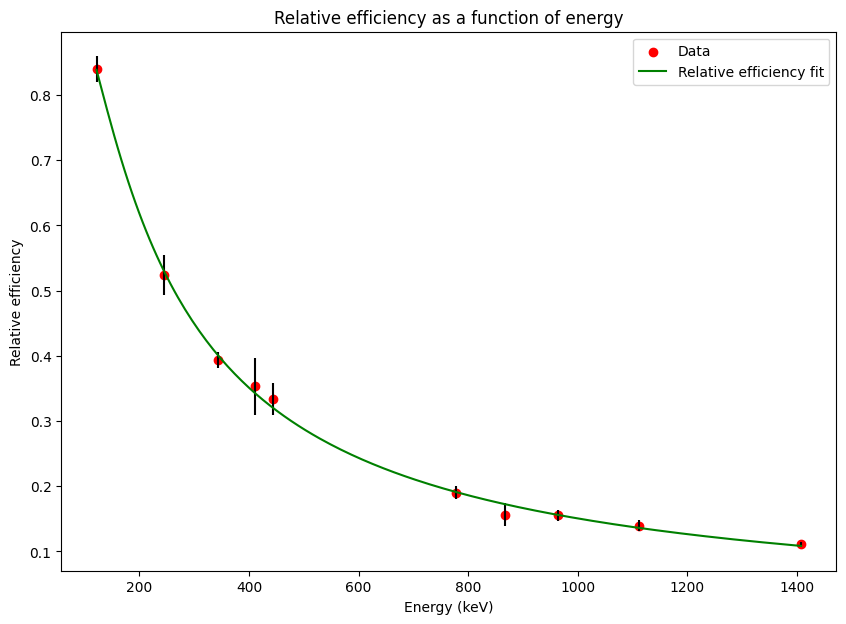

In [86]:
#Fitted line 
xfit = np.linspace(min(Energy), max(Energy), 200)
yfit = EffFunc(xfit, *popt)

plt.figure(figsize = [10,7])
plt.title("Relative efficiency as a function of energy")
plt.xlabel("Energy (keV)")
plt.ylabel("Relative efficiency")
plt.scatter(Energy, Efficiency, color = 'r', label = 'Data')
plt.errorbar(Energy, Efficiency, xerr = EnergyErr, yerr = EfficiencyErr, color = 'k', linestyle = '')
plt.plot(xfit,yfit, color = 'g', label = 'Relative efficiency fit')
plt.legend()
plt.show()